In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import re

In [2]:
def plot_percentiles(bounds):
    percentiles = {p : [] for p in (5, 10, 20, 80, 90, 95)}
    for key, value in percentiles.items():
        for b in bounds: value.append(np.percentile(b, key))
    pl.figure()
    for key, value in percentiles.items(): pl.plot(range(len(value)), value, label='%d' % key)
    pl.legend(framealpha=0, loc='best')
    pl.xlabel('index')
    pl.ylabel('percentile')
    pl.grid()

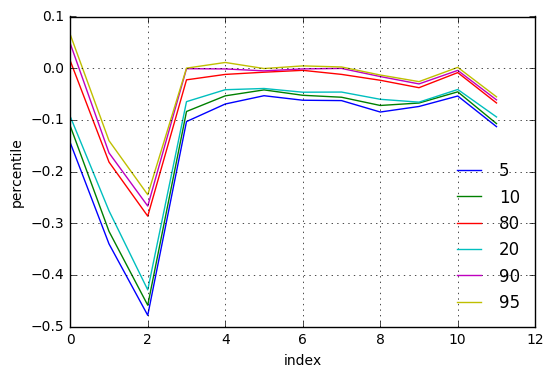

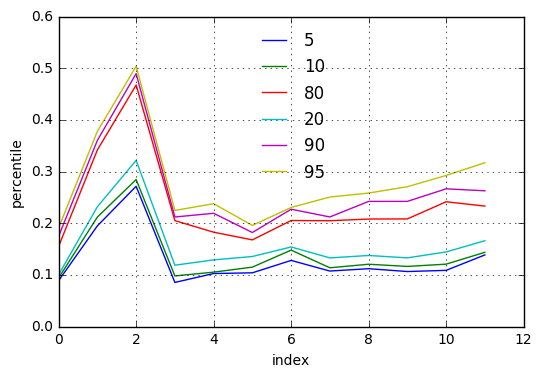

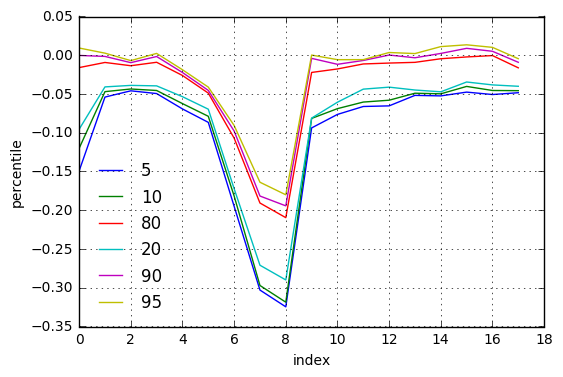

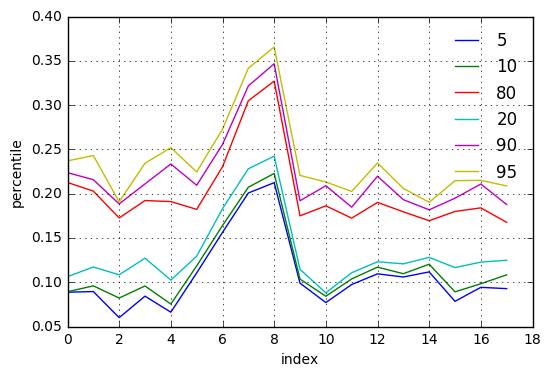

In [3]:
for N in (3, 5):
    parameters, _ = pickle.load(open('parameters/residual-network-n-%d-activate-drelu-times-1' % N, 'rb'))
    lower_map = {key : value for key, value in parameters.items() if 'lower' in key}
    upper_map = {key : value for key, value in parameters.items() if 'upper' in key}
    lowers, uppers = [], []
    for key in sorted(lower_map.keys()): lowers.append(lower_map[key])
    for key in sorted(upper_map.keys()): uppers.append(upper_map[key])
    plot_percentiles(lowers)
    plot_percentiles(uppers)